In [23]:
import cv2
from pylab import *
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import load_model
import tensorflow as tf
# 加载训练好的模型
model = load_model(r"C:/Users/Administrator/Desktop/English/权重/PSE5-19/dense.h5")
model.summary()  # 打印模型.查看参数及层的名称
# 设置为测试阶段


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 48)   1296        input_1[0][0]                    
__________________________________________________________________________________________________
average_pooling2d_1 (AveragePoo (None, 31, 31, 48)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 48)           0           average_pooling2d_1[0][0]        
____________________________________________________________________________________________

(1, 64, 64, 3)


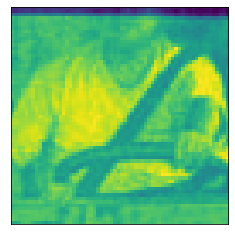

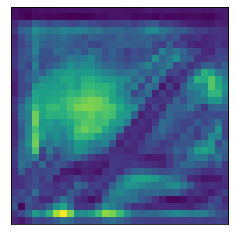

(1, 31, 31, 60)
(1, 31, 31)


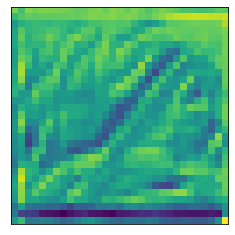

In [25]:
K.set_learning_phase(0)
graph = tf.get_default_graph()

test_path = r"D:/English_paper/text222222/2.jpg"
image = cv2.imread(test_path )
image = cv2.resize(image ,(64,64))
image = image .astype('float')/255.0
image = np.expand_dims(image ,0)

def get_layer_feature(img, model, layer_name):
    with graph.as_default():
        layer_fn = K.function([model.get_input_at(0)],[model.get_layer(layer_name).output])
        layer_output = layer_fn([img, 0])[0]
        return layer_output

print(np.shape(image))
image1 = np.sum(image, axis=-1)
plt.figure()
plt.imshow(image1[0,:,:]) # cmap='gray' 显示出什么颜色
# 去除坐标轴
plt.xticks([])
plt.yticks([])
#plt.savefig(r"C:/Users/Administrator/Desktop/look/no原9228.png")
plt.show()


layer_output = get_layer_feature(image , model, 'conv2d_10') # conv2d_3 为想观看的卷积层的名称
layer_output1 = np.sum(layer_output, axis=-1)
plt.figure()
plt.imshow(layer_output1[0,:,:],cmap="viridis") # cmap='gray' 显示出什么颜色
# 去除坐标轴
plt.xticks([])
plt.yticks([])
plt.savefig(r"C:/Users/Administrator/Desktop/新建文件夹/新建文件夹/PSE5-19之前2.png")
plt.show()

    
layer_output2 = get_layer_feature(image , model, 'conv2d_11') # conv2d_3 为想观看的卷积层的名称
print(np.shape(layer_output2))
layer_output3 = np.sum(layer_output2, axis=-1)
print(np.shape(layer_output1))
plt.figure()
label_tmp = layer_output3[0,:,:]
plt.imshow(layer_output3[0,:,:],cmap="viridis") # cmap='gray' 显示出什么颜色
#plt.imshow(label_tmp.reshape(31,31))
# 去除坐标轴
plt.xticks([])
plt.yticks([])
plt.savefig(r"C:/Users/Administrator/Desktop/新建文件夹/新建文件夹/PSE5-19之后2.png")
plt.show()

   